In [1]:
import pandas as pd
import json
import numpy as np
import sklearn
import matplotlib.pyplot  as plt
import seaborn as sns
from datetime import datetime, date, time, timedelta
%matplotlib inline
sns.set(style='whitegrid')

In [2]:
def flatten_json(input_path, output_path):
    with open(input_path, 'r') as infile:
        # Read the entire JSON content
        content = infile.read()
        
        # Load the content as a nested list
        nested_list = json.loads(content)
        
        # Flatten the nested list
        flattened_list = [item for sublist in nested_list for item in sublist]
        
        # Write the flattened JSON to a new file
        with open(output_path, 'w') as outfile:
            json.dump(flattened_list, outfile, indent=4)

# Calling function to flatten the accounts JSON
input_file_path = 'data/train/accounts_data_train.json'
output_file_path = 'data/train/flattened_account_data.json'
# flatten_json(input_file_path, output_file_path)

# Calling function to flatten the enquiry JSON
input_file_path = 'data/train/enquiry_data_train.json'
output_file_path = 'data/train/flattened_enquiry_data.json'
# flatten_json(input_file_path, output_file_path)


In [3]:
#reading the files
account_df = pd.read_json('data/train/flattened_account_data.json')
enquiry_df = pd.read_json('data/train/flattened_enquiry_data.json')
flag_df = pd.read_csv('data/train/train_flag.csv')

In [4]:
# #saving it to csv for manual inspection
# account_df.to_csv('data/train/flattened_account_data.csv', encoding='utf-8', index=False)
# enquiry_df.to_csv('data/train/flattened_enquiry_data.csv', encoding='utf-8', index=False)

In [5]:
print("Size of account table - ",account_df.shape)
print("Size of enquiry table - ",enquiry_df.shape)
print("Size of flag table - ",flag_df.shape)

Size of account table -  (1245310, 7)
Size of enquiry table -  (1909926, 4)
Size of flag table -  (261383, 3)


## Inspecting flag_df 

In [6]:
flag_df.head()

,uid,NAME_CONTRACT_TYPE,TARGET
0,XDA69787158,Cash loans,0
1,BSE47789733,Cash loans,0
2,NTJ92213825,Cash loans,0
3,TCQ47571695,Cash loans,0
4,WJZ68772744,Cash loans,0


In [7]:
flag_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261383 entries, 0 to 261382
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   uid                 261383 non-null  object
 1   NAME_CONTRACT_TYPE  261383 non-null  object
 2   TARGET              261383 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 6.0+ MB


In [8]:
flag_df.isna().sum()

uid                   0
NAME_CONTRACT_TYPE    0
TARGET                0
dtype: int64

In [9]:
flag_df.duplicated().sum()

0

In [10]:
flag_df['uid'].nunique()

261383

In [11]:
flag_df['NAME_CONTRACT_TYPE'].unique()

array(['Cash loans', 'Revolving loans'], dtype=object)

Text(0.5, 1.0, 'Frequency of what type of loan people took ?')

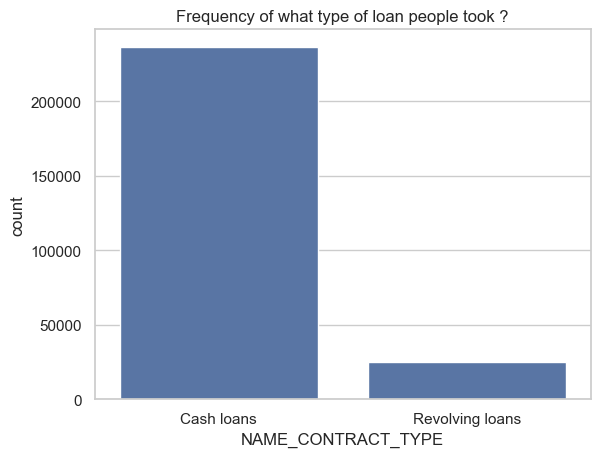

In [12]:
sns.countplot(data=flag_df,x='NAME_CONTRACT_TYPE')
plt.title('Frequency of what type of loan people took ?')

In [13]:
flag_df['TARGET'].value_counts()

TARGET
0    240326
1     21057
Name: count, dtype: int64

In [14]:
flag_df['TARGET'].value_counts()*100/flag_df['TARGET'].value_counts().sum()

TARGET
0    91.944006
1     8.055994
Name: count, dtype: float64

Text(0.5, 1.0, 'Frequency of loan default(1) and no default(0)')

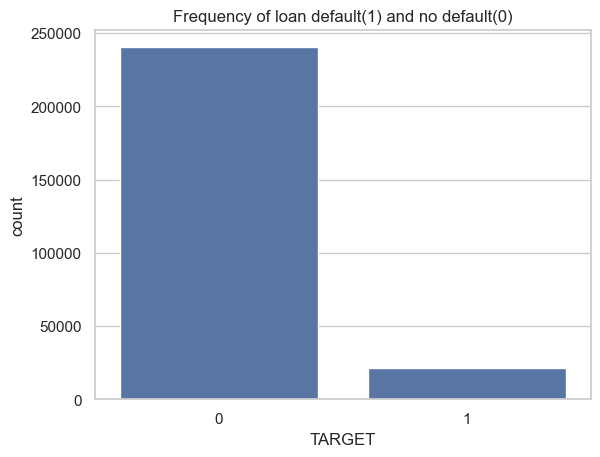

In [15]:
sns.countplot(data=flag_df,x='TARGET')
plt.title('Frequency of loan default(1) and no default(0)')

In [16]:
cash_loan_df = flag_df[flag_df['NAME_CONTRACT_TYPE'] == "Cash loans"]
revolving_loan_df = flag_df[flag_df['NAME_CONTRACT_TYPE'] == "Revolving loans"]

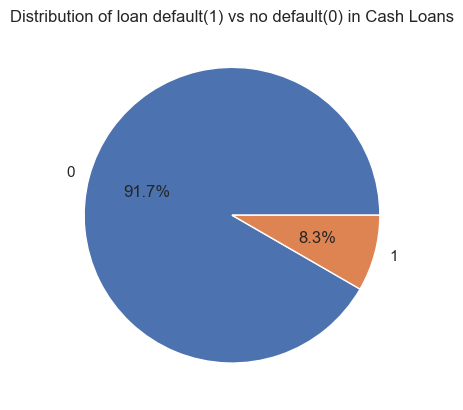

In [17]:
plt.pie(cash_loan_df['TARGET'].value_counts(), labels = cash_loan_df['TARGET'].value_counts().index, autopct="%0.1f%%")
plt.title('Distribution of loan default(1) vs no default(0) in Cash Loans')
plt.show()

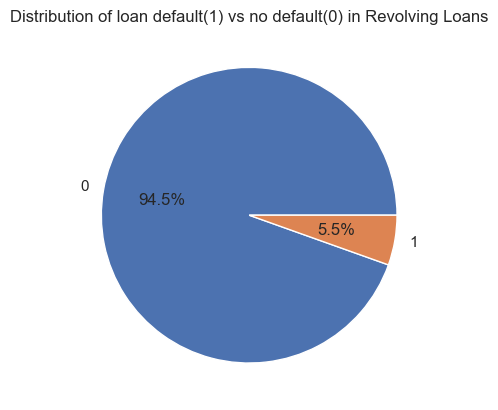

In [18]:
plt.pie(revolving_loan_df['TARGET'].value_counts(), labels = revolving_loan_df['TARGET'].value_counts().index, autopct="%0.1f%%")
plt.title('Distribution of loan default(1) vs no default(0) in Revolving Loans')
plt.show()

``` Inference ```
- Data has 261383 rows and 3 columns
- No null values
- No duplicates
- - Cash Loans: A fixed-amount loan repaid in regular installments over a set period. Eg. home loan, education loan
     - Revolving Loans: A flexible credit line allowing borrowing up to a limit, with variable repayments based on the outstanding balance. Eg. credit card
- Most people take cash loans
- Data is highly imbalanced - 92% is good loan (0) and 8% is bad loan (1) !

Preparing final dataset

In [19]:
final_df = flag_df.copy()

In [21]:
final_df.shape

(261383, 3)

## Inspecting account_df 

In [22]:
account_df.head()

,credit_type,loan_amount,amount_overdue,open_date,closed_date,payment_hist_string,uid
0,Consumer credit,272745.000,0.0,2018-09-22,2020-02-22,0000000000000000000000100000000000000000000000...,AAA09044550
1,Consumer credit,4500.000,0.0,2018-03-08,2019-07-25,000000000000000014044000000000000000000000000000,AAA09044550
2,Credit card,80996.445,0.0,2020-06-29,None,000000000000000000,AAA10545297
3,Consumer credit,43771.500,0.0,2020-06-09,2020-09-09,000000000,AAA14112888
4,Credit card,10480.500,0.0,2014-09-10,None,0000000000000000000000000000000000000000000000...,AAA20326915


In [23]:
account_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1245310 entries, 0 to 1245309
Data columns (total 7 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   credit_type          1245310 non-null  object 
 1   loan_amount          1245307 non-null  float64
 2   amount_overdue       1245310 non-null  float64
 3   open_date            1245310 non-null  object 
 4   closed_date          782275 non-null   object 
 5   payment_hist_string  1245310 non-null  object 
 6   uid                  1245310 non-null  object 
dtypes: float64(2), object(5)
memory usage: 66.5+ MB


It seems 3 loan_amount values are nan, let's check

In [24]:
account_df[account_df['loan_amount'].isna()]

,credit_type,loan_amount,amount_overdue,open_date,closed_date,payment_hist_string,uid
65605,Another type of loan,NaN,0.0,2021-01-01,2020-10-21,,BJV01354901
149202,Another type of loan,NaN,0.0,2021-01-01,None,,DCX71532515
613183,Another type of loan,NaN,0.0,2021-01-01,None,,MVG95017452


Removing 3 rows where loan_amount is nan

In [25]:
account_df = account_df.dropna(subset='loan_amount')

In [26]:
account_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1245307 entries, 0 to 1245309
Data columns (total 7 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   credit_type          1245307 non-null  object 
 1   loan_amount          1245307 non-null  float64
 2   amount_overdue       1245307 non-null  float64
 3   open_date            1245307 non-null  object 
 4   closed_date          782274 non-null   object 
 5   payment_hist_string  1245307 non-null  object 
 6   uid                  1245307 non-null  object 
dtypes: float64(2), object(5)
memory usage: 76.0+ MB


In [27]:
account_df['open_date'] = pd.to_datetime(account_df['open_date'])
account_df['closed_date'] = pd.to_datetime(account_df['closed_date'])

In [28]:
account_df.describe()

,loan_amount,amount_overdue,open_date,closed_date
count,1.245307e+06,1.245307e+06,1245307,782274
mean,3.523541e+05,4.202298e+01,2017-11-15 01:12:00.877663488,2018-03-16 01:07:23.252363776
min,0.000000e+00,0.000000e+00,2013-01-01 00:00:00,1905-12-13 00:00:00
25%,5.114700e+04,0.000000e+00,2016-06-07 00:00:00,2016-11-22 00:00:00
50%,1.246590e+05,0.000000e+00,2018-04-23 00:00:00,2018-07-17 00:00:00
75%,3.087000e+05,0.000000e+00,2019-09-19 00:00:00,2019-11-01 00:00:00
max,3.960000e+08,3.756681e+06,2021-01-01 00:00:00,2021-01-01 00:00:00
std,1.109812e+06,6.668695e+03,NaN,NaN


2 issues - 
- Minimum closed_date year is 1905 which looks absurd. 
- Closed date is less than open date for some, which is not possible 

In [29]:
account_df[account_df['closed_date'].dt.year<2013]

,credit_type,loan_amount,amount_overdue,open_date,closed_date,payment_hist_string,uid
380416,Consumer credit,711450.0,0.0,2018-03-17,2012-09-03,,HXU23242159
752854,Credit card,225000.0,0.0,2014-08-06,1905-12-13,,PSI76661644


In [30]:
account_df[account_df['closed_date'].dt.date<account_df['open_date'].dt.date]

,credit_type,loan_amount,amount_overdue,open_date,closed_date,payment_hist_string,uid
91932,Consumer credit,153000.0,0.0,2019-07-08,2019-06-17,,BXW18347652
143642,Consumer credit,450000.0,0.0,2017-05-27,2017-04-14,,CZP89943956
147697,Consumer credit,360000.0,0.0,2013-06-05,2013-03-14,,DBX47652567
212896,Credit card,675000.0,0.0,2019-03-27,2015-11-29,,ELL49792531
380416,Consumer credit,711450.0,0.0,2018-03-17,2012-09-03,,HXU23242159
642848,Mortgage,2250000.0,0.0,2017-03-12,2013-10-18,,NLJ87108009
664086,Consumer credit,93564.0,0.0,2017-06-02,2016-12-02,,NWS78995671
752854,Credit card,225000.0,0.0,2014-08-06,1905-12-13,,PSI76661644
920889,Consumer credit,1350000.0,0.0,2018-07-29,2018-02-04,,TFK88667051
941309,Consumer credit,157500.0,0.0,2015-11-22,2015-10-09,,TQK82834352


Removing these entries

In [31]:
remove_wrong_dates = account_df[account_df['closed_date'].dt.date<account_df['open_date'].dt.date].index
account_df = account_df.drop(remove_wrong_dates)
account_df.shape

(1245295, 7)

#### Working on uid column

In [32]:
account_df['uid'].nunique()

223917

#### Working on credit_type column

In [33]:
account_df['credit_type'].unique()

array(['Consumer credit', 'Credit card', 'Mortgage', 'Car loan',
       'Loan for business development', 'Microloan',
       'Another type of loan', 'Loan for working capital replenishment',
       'Unknown type of loan', 'Loan for the purchase of equipment',
       'Real estate loan', 'Cash loan (non-earmarked)',
       'Loan for purchase of shares (margin lending)', 'Interbank credit',
       'Mobile operator loan'], dtype=object)

In [34]:
my_index = account_df[(account_df['credit_type']=='Another type of loan') | (account_df['credit_type']=='Unknown type of loan')].index

In [35]:
account_df.loc[my_index]

,credit_type,loan_amount,amount_overdue,open_date,closed_date,payment_hist_string,uid
1385,Another type of loan,49500.000,0.0,2019-07-24,2020-01-05,000000000000000,AAS17707267
3440,Another type of loan,0.000,0.0,2017-03-10,2017-08-22,000000000000000,ABS84115354
4944,Another type of loan,238500.000,0.0,2017-06-01,2017-09-24,000000000,ACM77341914
5644,Unknown type of loan,225000.000,0.0,2018-07-03,NaT,0000000000270570000000000000000000000000000000...,ACV82598411
7074,Another type of loan,0.000,0.0,2016-01-11,2018-11-22,0000000000000000000000000000000000000000000000...,ADR48606558
...,...,...,...,...,...,...,...
1242557,Another type of loan,264861.675,0.0,2016-10-14,NaT,0000000000000000000000000000000000000000000000...,ZYL40828164
1242848,Another type of loan,0.000,0.0,2016-09-09,2018-02-14,0000000000000000000000000000000000000000000000...,ZYP79178195
1243452,Another type of loan,144000.000,0.0,2017-08-15,2018-08-16,000000000000000000000000000000000000,ZYZ05018891
1243531,Unknown type of loan,1350000.000,0.0,2020-08-21,NaT,000000000000,ZYZ85038085


In [36]:
account_df['credit_type'] = account_df['credit_type'].replace(['Another type of loan','Unknown type of loan'],'other_loans')

In [37]:
account_df.loc[my_index]

,credit_type,loan_amount,amount_overdue,open_date,closed_date,payment_hist_string,uid
1385,Other loan,49500.000,0.0,2019-07-24,2020-01-05,000000000000000,AAS17707267
3440,Other loan,0.000,0.0,2017-03-10,2017-08-22,000000000000000,ABS84115354
4944,Other loan,238500.000,0.0,2017-06-01,2017-09-24,000000000,ACM77341914
5644,Other loan,225000.000,0.0,2018-07-03,NaT,0000000000270570000000000000000000000000000000...,ACV82598411
7074,Other loan,0.000,0.0,2016-01-11,2018-11-22,0000000000000000000000000000000000000000000000...,ADR48606558
...,...,...,...,...,...,...,...
1242557,Other loan,264861.675,0.0,2016-10-14,NaT,0000000000000000000000000000000000000000000000...,ZYL40828164
1242848,Other loan,0.000,0.0,2016-09-09,2018-02-14,0000000000000000000000000000000000000000000000...,ZYP79178195
1243452,Other loan,144000.000,0.0,2017-08-15,2018-08-16,000000000000000000000000000000000000,ZYZ05018891
1243531,Other loan,1350000.000,0.0,2020-08-21,NaT,000000000000,ZYZ85038085


In [38]:
account_df['credit_type'].value_counts()

credit_type
Consumer credit                                 908732
Credit card                                     292420
Car loan                                         20237
Mortgage                                         13195
Microloan                                         7766
Loan for business development                     1466
Other loan                                        1103
Loan for working capital replenishment             320
Real estate loan                                    17
Cash loan (non-earmarked)                           17
Loan for the purchase of equipment                  16
Loan for purchase of shares (margin lending)         4
Interbank credit                                     1
Mobile operator loan                                 1
Name: count, dtype: int64

```Making column - total_tl```

So many categories, let's group then -
1. consumer loan
    - Consumer credit
    - Credit card
    - Cash loan (non-earmarked)
    - Microloan
    - Mobile operator loan
2. Mortgages loan
    - Mortgage
    - Real estate loan
3. automobile loan
    - Car loan
4. business loan
    - Loan for business development
    - Loan for working capital replenishment
    - Loan for the purchase of equipment
    - Loan for purchase of shares (margin lending)
    - Interbank credit
5. other loan

In [39]:
loan_type_mapping = {
    'Consumer credit': 'consumer_loans',
    'Credit card': 'consumer_loans',
    'Mortgage': 'mortgages_and_real_estate_oans',
    'Car loan': 'automobile_loans',
    'Loan for business development': 'business_loans',
    'Microloan': 'consumer_loans',
    'Loan for working capital replenishment': 'business_loans',
    'Loan for the purchase of equipment': 'business_loans',
    'Real estate loan': 'mortgages_and_real_estate_oans',
    'Cash loan (non-earmarked)': 'consumer_loans',
    'Loan for purchase of shares (margin lending)': 'business_loans',
    'Interbank credit': 'business_loans',
    'Mobile operator loan': 'consumer_loans'
}

account_df['credit_type'] = account_df['credit_type'].replace(loan_type_mapping)

account_df.head()

,credit_type,loan_amount,amount_overdue,open_date,closed_date,payment_hist_string,uid
0,Consumer Loans,272745.000,0.0,2018-09-22,2020-02-22,0000000000000000000000100000000000000000000000...,AAA09044550
1,Consumer Loans,4500.000,0.0,2018-03-08,2019-07-25,000000000000000014044000000000000000000000000000,AAA09044550
2,Consumer Loans,80996.445,0.0,2020-06-29,NaT,000000000000000000,AAA10545297
3,Consumer Loans,43771.500,0.0,2020-06-09,2020-09-09,000000000,AAA14112888
4,Consumer Loans,10480.500,0.0,2014-09-10,NaT,0000000000000000000000000000000000000000000000...,AAA20326915


In [40]:
temp_df = account_df.groupby('uid').size().reset_index()
temp_df

,uid,0
0,AAA09044550,2
1,AAA10545297,1
2,AAA14112888,1
3,AAA20326915,8
4,AAA31604840,5
...,...,...
223912,ZZZ74526004,3
223913,ZZZ78449185,7
223914,ZZZ79008454,3
223915,ZZZ81253108,4


In [41]:
final_df = final_df.merge(temp_df, on ='uid', how='left')

In [42]:
final_df = final_df.rename(columns={0:'Total_tl'})
final_df.head()

,uid,NAME_CONTRACT_TYPE,TARGET,Total_tl
0,XDA69787158,Cash loans,0,1.0
1,BSE47789733,Cash loans,0,1.0
2,NTJ92213825,Cash loans,0,1.0
3,TCQ47571695,Cash loans,0,3.0
4,WJZ68772744,Cash loans,0,NaN


In [43]:
final_df['Total_tl'].fillna(0, inplace=True)
final_df.head()

C:\Users\PRIYA\AppData\Local\Temp\ipykernel_16924\3561222252.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df['Total_tl'].fillna(0, inplace=True)


,uid,NAME_CONTRACT_TYPE,TARGET,Total_tl
0,XDA69787158,Cash loans,0,1.0
1,BSE47789733,Cash loans,0,1.0
2,NTJ92213825,Cash loans,0,1.0
3,TCQ47571695,Cash loans,0,3.0
4,WJZ68772744,Cash loans,0,0.0


In [44]:
final_df.shape

(261383, 4)

``` Making closed TL and active TL columns```

In [45]:
temp_df = account_df[~account_df['closed_date'].isna()].groupby('uid').size().reset_index()
temp_df

,uid,0
0,AAA09044550,2
1,AAA14112888,1
2,AAA20326915,5
3,AAA31604840,2
4,AAA54240429,1
...,...,...
195736,ZZZ74526004,3
195737,ZZZ78449185,7
195738,ZZZ79008454,1
195739,ZZZ81253108,1


In [46]:
final_df = final_df.merge(temp_df, on ='uid', how='left')
final_df = final_df.rename(columns={0:'Complete_tl'})
final_df['Complete_tl'].fillna(0, inplace=True)
final_df['Active_tl'] = final_df['Total_tl']-final_df['Complete_tl']
final_df.head()

C:\Users\PRIYA\AppData\Local\Temp\ipykernel_16924\2812592003.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df['Complete_tl'].fillna(0, inplace=True)


,uid,NAME_CONTRACT_TYPE,TARGET,Total_tl,Complete_tl,Active_tl
0,XDA69787158,Cash loans,0,1.0,0.0,1.0
1,BSE47789733,Cash loans,0,1.0,1.0,0.0
2,NTJ92213825,Cash loans,0,1.0,1.0,0.0
3,TCQ47571695,Cash loans,0,3.0,2.0,1.0
4,WJZ68772744,Cash loans,0,0.0,0.0,0.0


In [47]:
final_df.shape

(261383, 6)

``` total_amount_overdue and average_loan_amount ```

In [48]:
aggregated_df  = account_df.groupby('uid').agg({'amount_overdue':'sum','loan_amount':'mean'}).reset_index()
aggregated_df

,uid,amount_overdue,loan_amount
0,AAA09044550,0.0,1.386225e+05
1,AAA10545297,0.0,8.099645e+04
2,AAA14112888,0.0,4.377150e+04
3,AAA20326915,0.0,7.394962e+04
4,AAA31604840,0.0,3.183921e+05
...,...,...,...
223912,ZZZ74526004,0.0,3.786450e+04
223913,ZZZ78449185,0.0,9.283436e+04
223914,ZZZ79008454,127260.0,1.672022e+06
223915,ZZZ81253108,0.0,1.334430e+06


In [49]:
aggregated_df.rename(columns={'amount_overdue': 'amount_overdue_sum', 'loan_amount': 'loan_amount_avg'}, inplace=True)
final_df = pd.merge(final_df, aggregated_df, on='uid', how='left')

In [50]:
final_df.head()

,uid,NAME_CONTRACT_TYPE,TARGET,Total_tl,Complete_tl,Active_tl,amount_overdue_sum,loan_amount_avg
0,XDA69787158,Cash loans,0,1.0,0.0,1.0,0.0,450000.0
1,BSE47789733,Cash loans,0,1.0,1.0,0.0,0.0,110155.5
2,NTJ92213825,Cash loans,0,1.0,1.0,0.0,0.0,103783.5
3,TCQ47571695,Cash loans,0,3.0,2.0,1.0,0.0,224292.0
4,WJZ68772744,Cash loans,0,0.0,0.0,0.0,NaN,NaN


In [51]:
final_df.shape

(261383, 8)

In [52]:
final_df['amount_overdue_sum'].fillna(0, inplace=True)
final_df['loan_amount_avg'].fillna(0, inplace=True)
final_df.head()

C:\Users\PRIYA\AppData\Local\Temp\ipykernel_16924\1164728202.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df['amount_overdue_sum'].fillna(0, inplace=True)
C:\Users\PRIYA\AppData\Local\Temp\ipykernel_16924\1164728202.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

,uid,NAME_CONTRACT_TYPE,TARGET,Total_tl,Complete_tl,Active_tl,amount_overdue_sum,loan_amount_avg
0,XDA69787158,Cash loans,0,1.0,0.0,1.0,0.0,450000.0
1,BSE47789733,Cash loans,0,1.0,1.0,0.0,0.0,110155.5
2,NTJ92213825,Cash loans,0,1.0,1.0,0.0,0.0,103783.5
3,TCQ47571695,Cash loans,0,3.0,2.0,1.0,0.0,224292.0
4,WJZ68772744,Cash loans,0,0.0,0.0,0.0,0.0,0.0


``` num_times_delinquent ```

In [53]:
account_df = account_df.reset_index(drop=True)

In [54]:
def calculate_payment_features(hist_string):
    segments = [int(hist_string[i:i+3]) for i in range(0, len(hist_string), 3)]
    
    # Calculate total deliquent payment (no. of months with any overdue days)
    num_times_delinquent = len([days for days in segments if days > 0])
    
    # # Calculate time since recent delinquency
    # recent_delinquency_index = -1
    # for i, days in enumerate(reversed(segments)):
    #     if days > 0:
    #         recent_delinquency_index = len(segments) - 1 - i
    #         break
    
    # # Calculate time since recent delinquency
    # if recent_delinquency_index == -1:
    #     time_since_recent_delinquency = None  # No delinquency found
    # else:
    #     time_since_recent_delinquency = len(segments) - recent_delinquency_index - 1
    
    # return pd.Series({
    #     'num_times_delinquent': num_times_delinquent,
    #     'time_since_recent_delinquency': time_since_recent_delinquency
    # })

    return num_times_delinquent

account_df['num_times_delinquent'] = account_df['payment_hist_string'].apply(calculate_payment_features)
account_df.head()

,credit_type,loan_amount,amount_overdue,open_date,closed_date,payment_hist_string,uid,num_times_delinquent
0,Consumer Loans,272745.000,0.0,2018-09-22,2020-02-22,0000000000000000000000100000000000000000000000...,AAA09044550,1
1,Consumer Loans,4500.000,0.0,2018-03-08,2019-07-25,000000000000000014044000000000000000000000000000,AAA09044550,2
2,Consumer Loans,80996.445,0.0,2020-06-29,NaT,000000000000000000,AAA10545297,0
3,Consumer Loans,43771.500,0.0,2020-06-09,2020-09-09,000000000,AAA14112888,0
4,Consumer Loans,10480.500,0.0,2014-09-10,NaT,0000000000000000000000000000000000000000000000...,AAA20326915,31


In [57]:
deliquent_df = account_df.groupby('uid')['num_times_delinquent'].sum()

In [58]:
final_df.shape

(261383, 8)

In [60]:
final_df = pd.merge(final_df, deliquent_df, on='uid', how='left')

In [61]:
final_df.shape

(261383, 9)

In [63]:
final_df.sample(10)

,uid,NAME_CONTRACT_TYPE,TARGET,Total_tl,Complete_tl,Active_tl,amount_overdue_sum,loan_amount_avg,num_times_delinquent
4544,CMF79596987,Cash loans,0,13.0,10.0,3.0,0.0,186068.076923,8.0
8229,MDW16342250,Cash loans,0,4.0,3.0,1.0,0.0,49640.568750,0.0
56690,FGK36290464,Cash loans,0,10.0,6.0,4.0,0.0,246219.300000,2.0
158281,ETQ18428496,Cash loans,0,2.0,1.0,1.0,0.0,348752.250000,1.0
32042,WSA75082510,Cash loans,0,0.0,0.0,0.0,0.0,0.000000,NaN
203188,XFB30502002,Cash loans,0,7.0,7.0,0.0,0.0,88210.285714,0.0
80740,GPY08924677,Cash loans,0,2.0,1.0,1.0,0.0,182560.500000,0.0
5406,YUD56874863,Cash loans,0,3.0,2.0,1.0,0.0,181935.000000,0.0
103313,CBI41547030,Cash loans,0,4.0,2.0,2.0,0.0,56389.500000,0.0
110309,RRF43166232,Cash loans,0,0.0,0.0,0.0,0.0,0.000000,NaN


``` frequency of each credit_type ```

In [77]:
account_df[account_df['uid']=='ZZZ81253108']

,credit_type,loan_amount,amount_overdue,open_date,closed_date,payment_hist_string,uid,num_times_delinquent
1245283,Consumer Loans,121500.0,0.0,2020-01-09,NaT,000000000000000000000000000000000,ZZZ81253108,0
1245284,Consumer Loans,234000.0,0.0,2019-04-22,NaT,0000000000000180480000000000000000000000000000...,ZZZ81253108,2
1245285,Automobile Loans,2529720.0,0.0,2018-03-26,2019-09-24,0000000000000000000000000000000000000000000000...,ZZZ81253108,0
1245286,Consumer Loans,2452500.0,0.0,2020-01-05,NaT,000000000000000000000000000000000000,ZZZ81253108,0


In [95]:
for_pivot_df = account_df[['uid','credit_type']]
x = pd.pivot_table(for_pivot_df,index='uid',columns='credit_type',aggfunc='size', fill_value=0)
x.reset_index(inplace=True)
x

credit_type,uid,Automobile Loans,Business Loans,Consumer Loans,Mortgages and Real Estate Loans,Other loan
0,AAA09044550,0,0,2,0,0
1,AAA10545297,0,0,1,0,0
2,AAA14112888,0,0,1,0,0
3,AAA20326915,0,0,8,0,0
4,AAA31604840,0,0,5,0,0
...,...,...,...,...,...,...
223912,ZZZ74526004,0,0,3,0,0
223913,ZZZ78449185,0,0,7,0,0
223914,ZZZ79008454,0,0,3,0,0
223915,ZZZ81253108,1,0,3,0,0


In [96]:
automobie_loan_count = x.groupby('uid')['automobile_loans'].sum()
business_loan_count = x.groupby('uid')['business_loans'].sum()
consumer_loan_count = x.groupby('uid')['consumer_loans'].sum()
real_estate_loan_count = x.groupby('uid')['mortgages_and_real_estate_loans'].sum()
other_loan_count = x.groupby('uid')['other_loans'].sum()

In [100]:
final_df = pd.merge(final_df, automobie_loan_count, on='uid', how='left')
final_df = pd.merge(final_df, business_loan_count, on='uid', how='left')
final_df = pd.merge(final_df, consumer_loan_count, on='uid', how='left')
final_df = pd.merge(final_df, real_estate_loan_count, on='uid', how='left')
final_df = pd.merge(final_df, other_loan_count, on='uid', how='left')

print(final_df.shape)

(261383, 14)


In [101]:
final_df.head()

,uid,NAME_CONTRACT_TYPE,TARGET,Total_tl,Complete_tl,Active_tl,amount_overdue_sum,loan_amount_avg,num_times_delinquent,Automobile Loans,Business Loans,Consumer Loans,Mortgages and Real Estate Loans,Other loan
0,XDA69787158,Cash loans,0,1.0,0.0,1.0,0.0,450000.0,0.0,0.0,0.0,1.0,0.0,0.0
1,BSE47789733,Cash loans,0,1.0,1.0,0.0,0.0,110155.5,0.0,0.0,0.0,1.0,0.0,0.0
2,NTJ92213825,Cash loans,0,1.0,1.0,0.0,0.0,103783.5,0.0,0.0,0.0,1.0,0.0,0.0
3,TCQ47571695,Cash loans,0,3.0,2.0,1.0,0.0,224292.0,0.0,0.0,0.0,3.0,0.0,0.0
4,WJZ68772744,Cash loans,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


``` Inference ```
- Data has 1245310 rows but 3 had loan_amount as nan so removed them
- Data has 7 columns
- credit_type - replace mapping
- removed outlier - 1905 year from closed_date
- made features like total_tl, complete_tl, active_tl
- Closed date is less than open date for some, which is not possible, so removing such entries
- created features - total_amount_overdue and average_loan_amount, num_times_delinquent
- Created features - frequency of each credit_type

## Inspecting enquiry_df 

In [103]:
enquiry_df.head()

,enquiry_type,enquiry_amt,enquiry_date,uid
0,Interbank credit,168839,2020-11-08,AAA08065248
1,Mobile operator loan,268392,2020-09-20,AAA08065248
2,Mobile operator loan,36082,2020-06-19,AAA08065248
3,Interbank credit,180467,2019-10-22,AAA08065248
4,Cash loan (non-earmarked),227459,2020-05-24,AAA08065248


In [104]:
enquiry_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1909926 entries, 0 to 1909925
Data columns (total 4 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   enquiry_type  object
 1   enquiry_amt   int64 
 2   enquiry_date  object
 3   uid           object
dtypes: int64(1), object(3)
memory usage: 58.3+ MB


In [105]:
enquiry_df.isna().sum()

enquiry_type    0
enquiry_amt     0
enquiry_date    0
uid             0
dtype: int64

In [110]:
enquiry_df.duplicated().sum()

9

In [111]:
enquiry_df = enquiry_df.drop_duplicates()

In [112]:
enquiry_df.shape

(1909917, 4)

``` Inference ```
- no null value
- 9 duplicate rows dropped